In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
data= load_diabetes()


In [11]:
data = load_diabetes()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="disease_progression")

In [12]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


# Feature	Description
## s1	TC: Total cholesterol
## s2	LDL: Low-density lipoproteins
## s3	HDL: High-density lipoproteins
## s4	TCH: Total cholesterol / HDL
## s5	LTG: Possibly log of serum triglycerides
## s6	GLU: Blood sugar level

### These are physiological measurements relevant to diabetes progression.

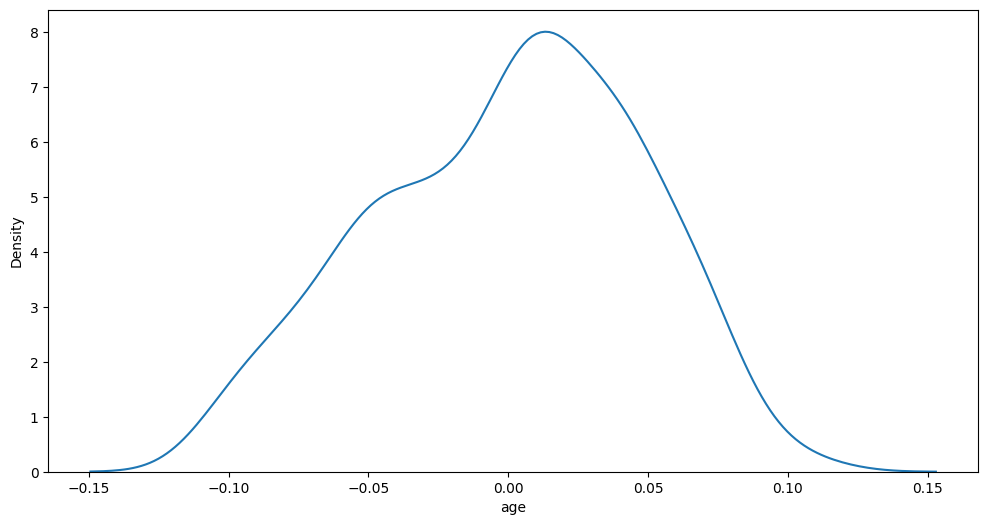

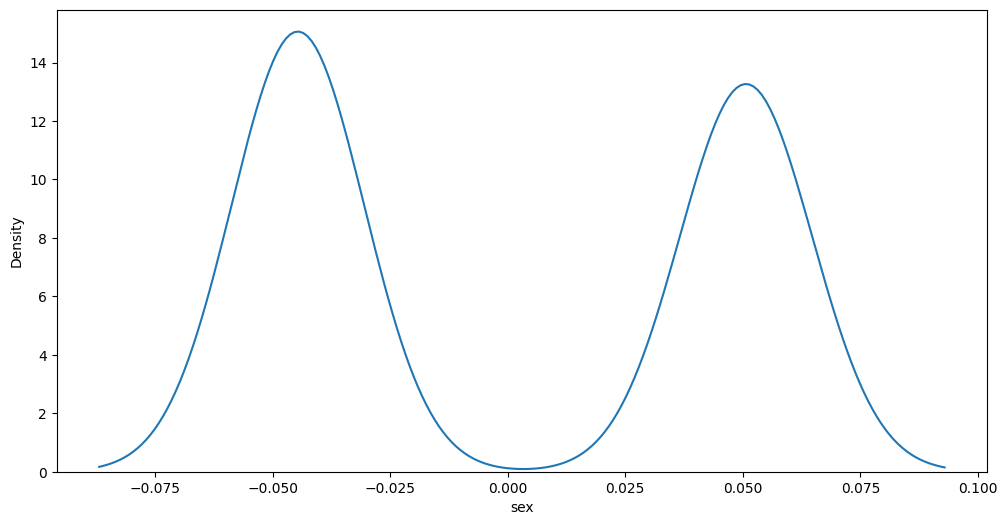

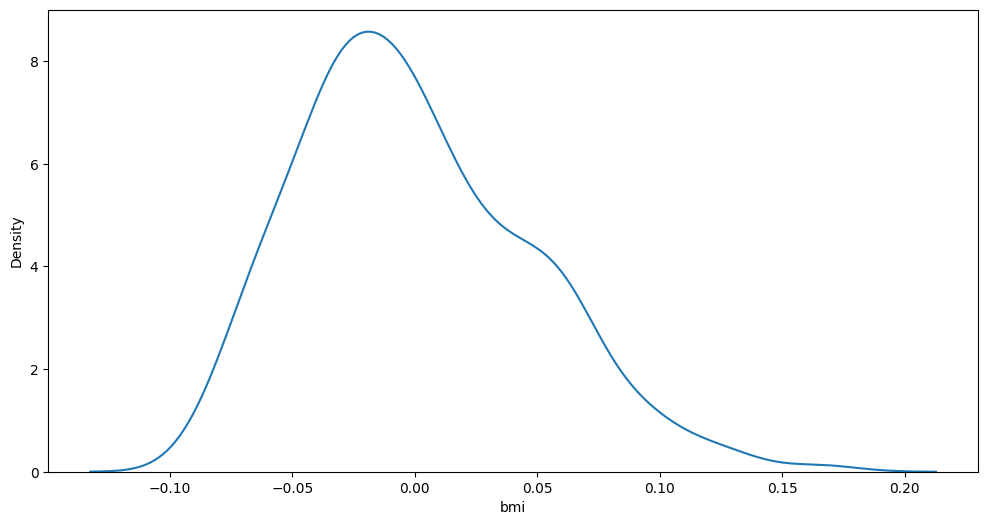

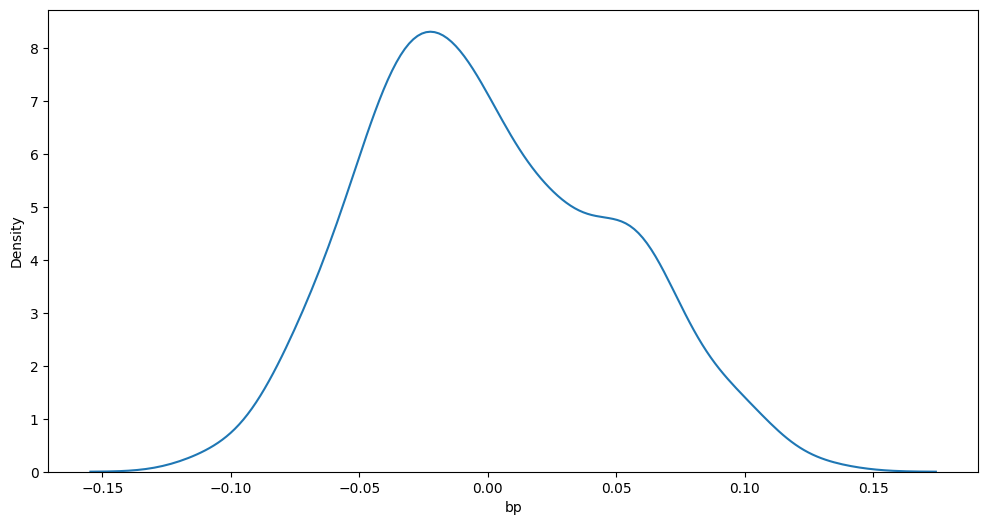

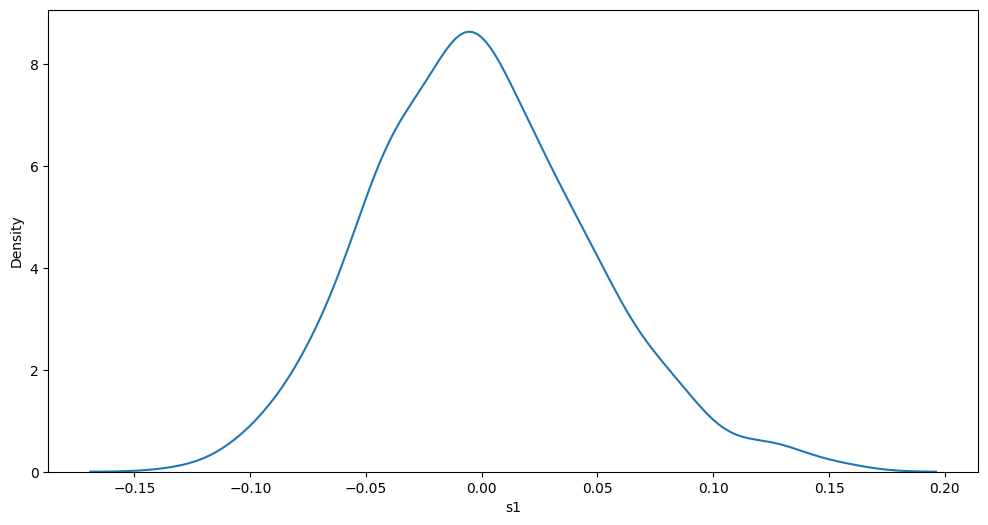

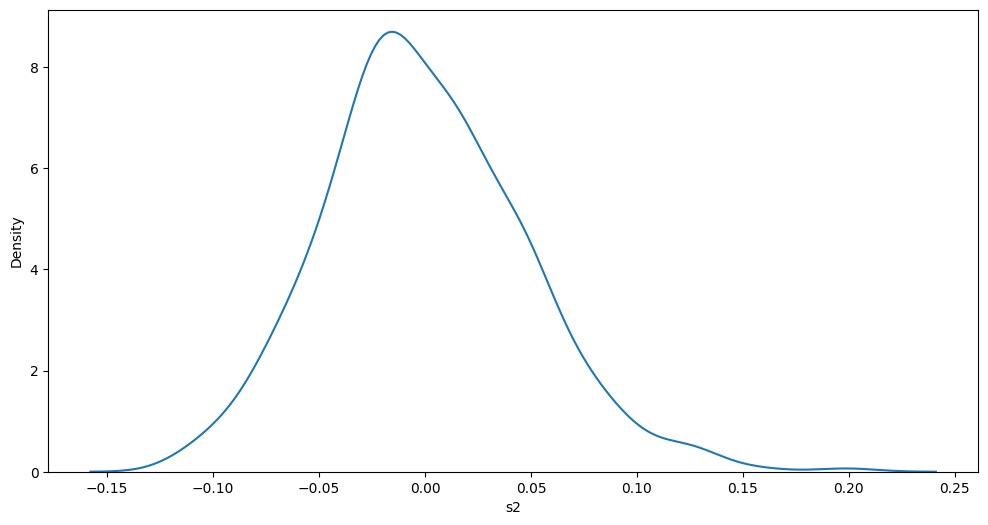

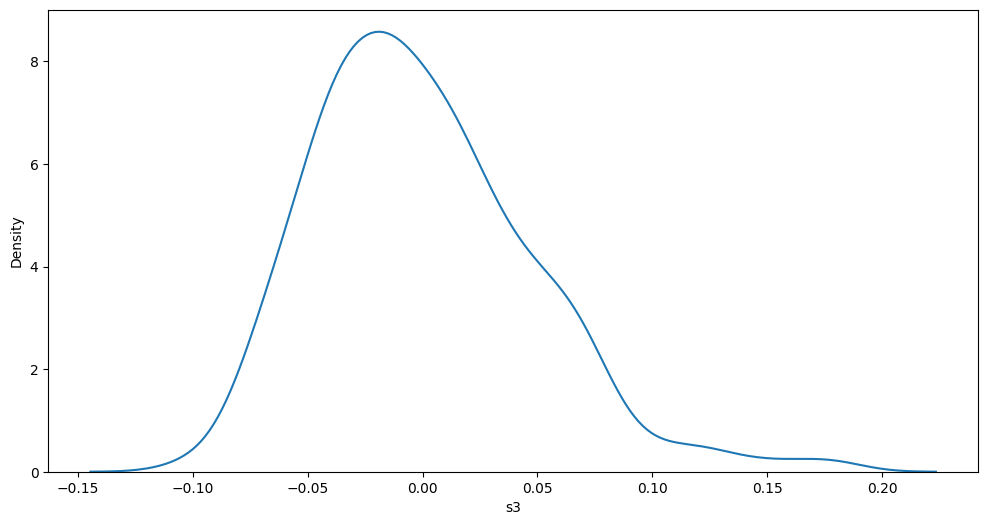

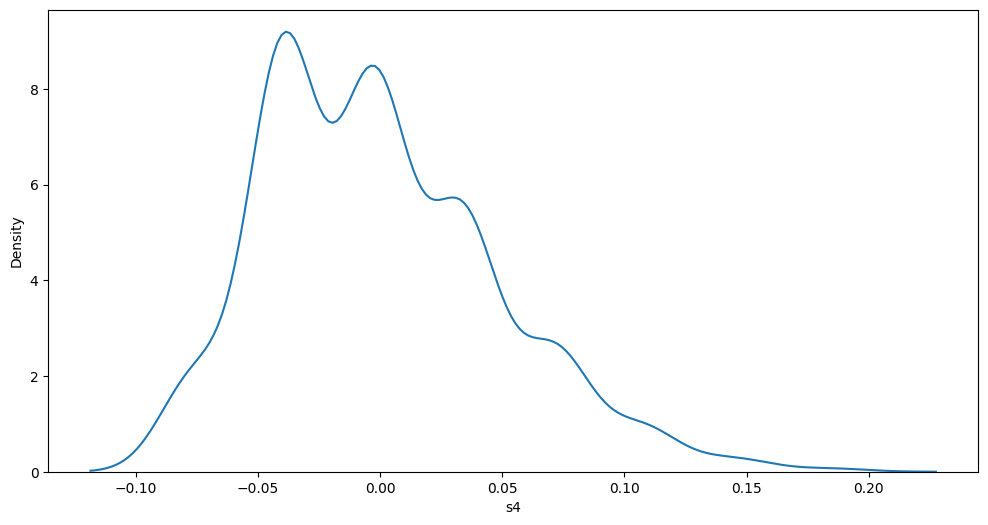

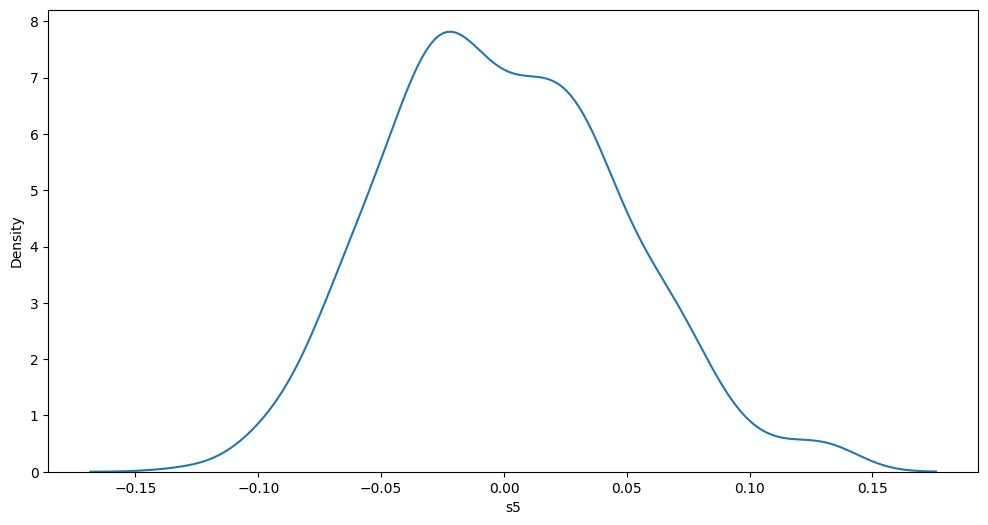

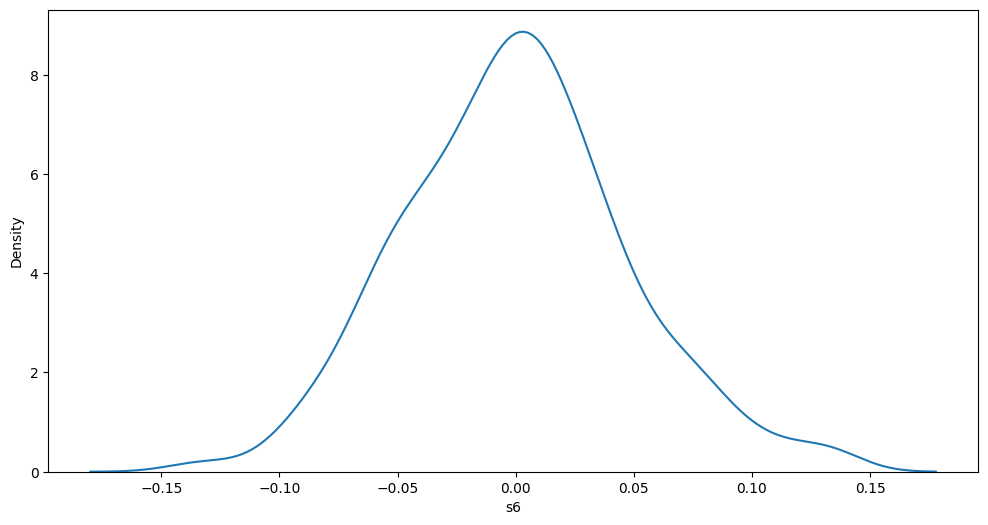

In [102]:


for col in x.columns:
    plt.figure(figsize=(12,6))
    sns.kdeplot(x=x[col])

In [144]:
poly= PolynomialFeatures(degree=3)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [146]:
x_train_trf=poly.fit_transform(x_train)
x_test_trf=poly.fit_transform(x_test)

In [147]:
lr=LinearRegression()

In [152]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [153]:
lr_pred= lr.predict(x_test)

In [154]:
r2_score(lr_pred,y_test)

0.1337776418288148

In [155]:
mean_absolute_error(lr_pred,y_test)

40.66687249174515

In [156]:
np.sqrt(mean_squared_error(lr_pred,y_test))

np.float64(51.48747105443428)

In [85]:
rr= Ridge(alpha=0.0001)

In [86]:
rr.fit(x_train,y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [87]:
rr_pred= rr.predict(x_test)

In [88]:
r2_score(rr_pred,y_test)

0.1329981563935384

In [89]:
mean_absolute_error(rr_pred,y_test)

40.649953234107016

In [80]:
np.sqrt(mean_squared_error(rr_pred,y_test))

np.float64(68.37466988794384)

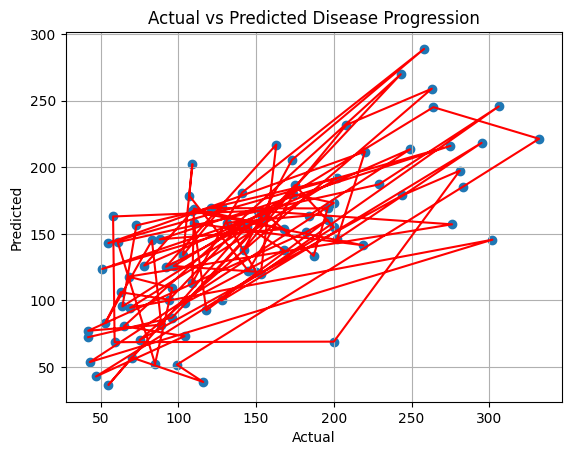

In [110]:
plt.scatter(y_test, lr_pred)
plt.plot(y_test, lr_pred,color="r")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Disease Progression")
plt.grid(True)
plt.show()

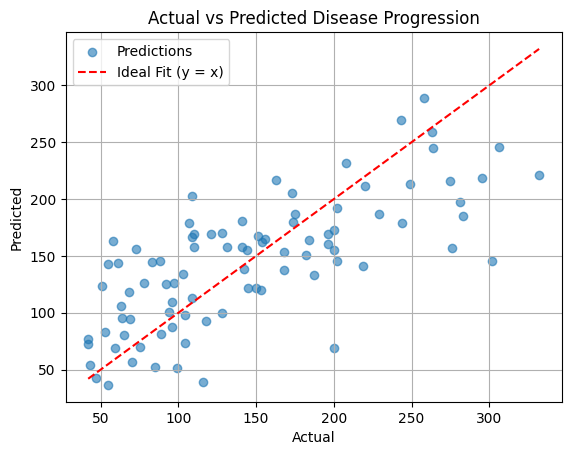

In [ ]:

plt.scatter(y_test, lr_pred, alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit (y = x)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Disease Progression")
plt.legend()
plt.grid(True)
plt.show()
